The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [6]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# Start coding here!
nobel= pd.read_csv("nobel1.csv")
print(nobel.head())

   Unnamed: 0  year    category  \
0           0  1901   Chemistry   
1           1  1901  Literature   
2           2  1901    Medicine   
3           3  1901       Peace   
4           4  1901       Peace   

                                            prize  \
0               The Nobel Prize in Chemistry 1901   
1              The Nobel Prize in Literature 1901   
2  The Nobel Prize in Physiology or Medicine 1901   
3                      The Nobel Peace Prize 1901   
4                      The Nobel Peace Prize 1901   

                                          motivation prize_share  laureate_id  \
0  "in recognition of the extraordinary services ...         1/1          160   
1  "in special recognition of his poetic composit...         1/1          569   
2  "for his work on serum therapy, especially its...         1/1          293   
3                                                NaN         1/2          462   
4                                                NaN         1/2 

I am using .head() and .info() to get an initial overview of the dataset.

In [9]:
print(nobel.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            1000 non-null   int64 
 1   year                  1000 non-null   int64 
 2   category              1000 non-null   object
 3   prize                 1000 non-null   object
 4   motivation            912 non-null    object
 5   prize_share           1000 non-null   object
 6   laureate_id           1000 non-null   int64 
 7   laureate_type         1000 non-null   object
 8   full_name             1000 non-null   object
 9   birth_date            968 non-null    object
 10  birth_city            964 non-null    object
 11  birth_country         969 non-null    object
 12  sex                   970 non-null    object
 13  organization_name     736 non-null    object
 14  organization_city     735 non-null    object
 15  organization_country  735 non-null    o

In [300]:
print(nobel.isna().sum())

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               32
birth_city               36
birth_country            31
sex                      30
organization_name       264
organization_city       265
organization_country    265
death_date              404
death_city              421
death_country           415
dtype: int64


Although not the scope of this exercise, the first thing I noticed is that this DataFrame contains a significant number of null values (594 rows with at least one null value). Some columns like birth_country only have 31 missing values, whereas some columns like death_city and death_country have 421 and 415 missing values respectively. Subsetting only the rows with missing values we have:

In [301]:
null_mask = nobel.isna().any(axis=1)
null_rows = nobel[null_mask]

print(null_rows)

     year    category                                              prize  \
1    1901  Literature                 The Nobel Prize in Literature 1901   
3    1901       Peace                         The Nobel Peace Prize 1901   
4    1901       Peace                         The Nobel Peace Prize 1901   
7    1902  Literature                 The Nobel Prize in Literature 1902   
9    1902       Peace                         The Nobel Peace Prize 1902   
..    ...         ...                                                ...   
995  2023   Chemistry                  The Nobel Prize in Chemistry 2023   
996  2023   Chemistry                  The Nobel Prize in Chemistry 2023   
997  2023  Literature                 The Nobel Prize in Literature 2023   
998  2023       Peace                         The Nobel Peace Prize 2023   
999  2023   Economics  The Sveriges Riksbank Prize in Economic Scienc...   

                                            motivation prize_share  \
1    "in special 

Looking more closely at the columns with missing values, rows corresponding to organizations like Center for Civil Liberties or World Food Programme have columns such as birth_country, birth_city, and death_country with missing values. This is expected, as these rows represent organizations rather than individuals, so attributes like birthplace or death information are not applicable. Additionally, columns like death_country and death_city are missing for laureates who are still alive, such as Katalin Karikó. These missing values do not represent a data quality issue but rather reflect the inherent nature of the dataset, where certain fields are not applicable for some types of records.

In [302]:
pd.set_option('display.max_columns', None)
birth_country_nulls= nobel[nobel['birth_country'].isna()]

print(birth_country_nulls)

     year    category                               prize  \
24   1904       Peace          The Nobel Peace Prize 1904   
60   1910       Peace          The Nobel Peace Prize 1910   
89   1917       Peace          The Nobel Peace Prize 1917   
200  1938       Peace          The Nobel Peace Prize 1938   
215  1944       Peace          The Nobel Peace Prize 1944   
237  1947       Peace          The Nobel Peace Prize 1947   
238  1947       Peace          The Nobel Peace Prize 1947   
283  1954       Peace          The Nobel Peace Prize 1954   
348  1963       Peace          The Nobel Peace Prize 1963   
349  1963       Peace          The Nobel Peace Prize 1963   
366  1965       Peace          The Nobel Peace Prize 1965   
399  1969       Peace          The Nobel Peace Prize 1969   
479  1977       Peace          The Nobel Peace Prize 1977   
523  1981       Peace          The Nobel Peace Prize 1981   
558  1985       Peace          The Nobel Peace Prize 1985   
588  1988       Peace   

Now, answerig the questions of the exercise we have:
1. What is the most commonly awarded gender and birth country?

Store your answers as string variables top_gender and top_country.

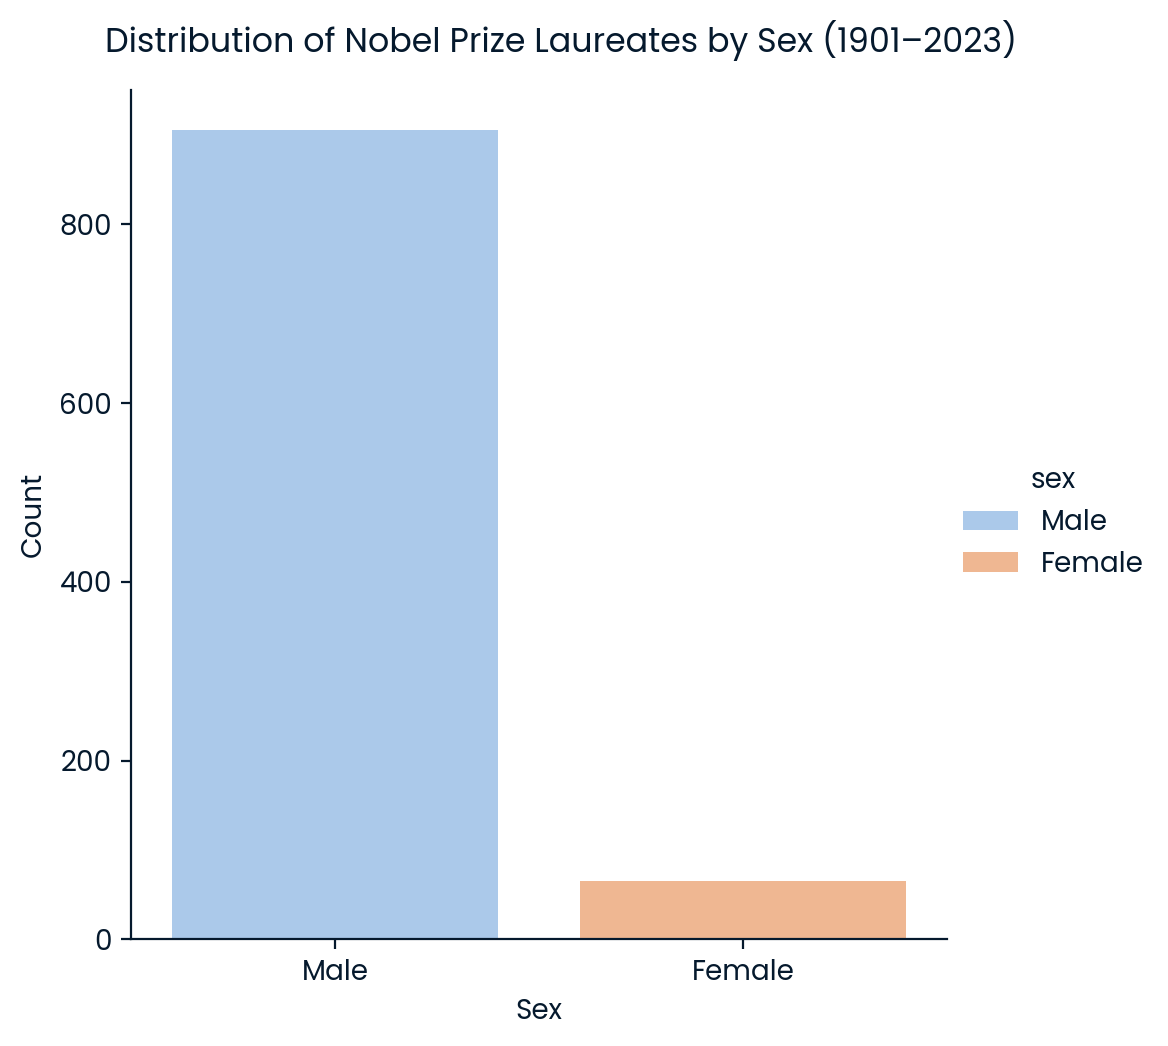

In [303]:
sns.set_palette('pastel')
sex_distribution_plot= sns.catplot(x= 'sex', data= nobel, kind= 'count', hue= 'sex')
sex_distribution_plot.fig.suptitle('Distribution of Nobel Prize Laureates by Sex (1901–2023)',
                                  y= 1.04)
sex_distribution_plot.set(xlabel= 'Sex',
                         ylabel='Count')

In [304]:
# Calculate counts
sex_counts = nobel["sex"].value_counts()

# Calculate percentages
sex_percentages = nobel["sex"].value_counts(normalize=True) * 100

# Combine into a DataFrame
sex_distribution = pd.DataFrame({
    "Count": sex_counts,
    "Percentage": sex_percentages
})

# Display the DataFrame
print(sex_distribution)

        Count  Percentage
Male      905   93.298969
Female     65    6.701031


In [305]:
top_gender= nobel.mode()['sex'][0]
top_country= nobel.mode()['birth_country'][0]
print(top_gender)
print(top_country)


Male
United States of America


As we can observe from the count plot, the majority of Nobel Prize laureates are male, comprising an overwhelming 93% of all recipients from 1901 to 2023. Additionally, the United States stands out as the most common country of birth among laureates.

2. Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?
Store this as an integer called max_decade_usa.


[Text(0.5, 1.0, 'Distribution of US-born Nobel Laureates by Decade')]

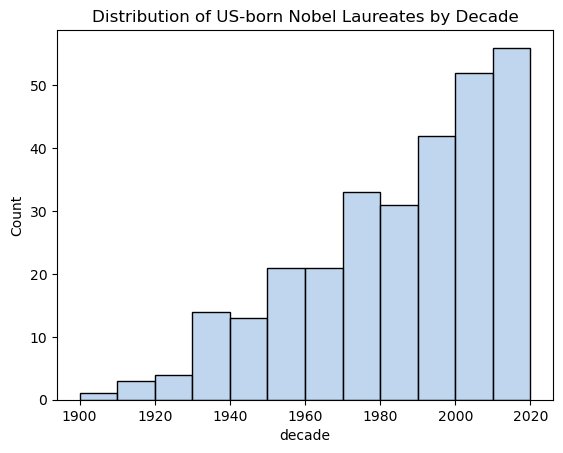

In [15]:
# Extracting the decade from the year and creating a new column with this information
nobel['decade'] = (nobel['year'] // 10) * 10

# Subseting Nobel laureates that were born in the US
us_born= nobel[nobel['birth_country']=='United States of America']

# A histogram to visualize the distribution of US-born Nobel prize winners by decade
sns.histplot(us_born['decade'], bins=range(min(us_born['decade']), 
                                                     max(us_born['decade']) + 10, 10),
             color='#ABC9EA').set(title='Distribution of US-born Nobel Laureates by Decade')


In [307]:
# Categorize laureates by birth region, US born vs born in a different country
nobel['birth_region'] = nobel['birth_country'].apply(
    lambda x: 'USA' if x == 'United States of America' else 'Other'
)

This is the same as
def categorize_birth_region(x):
    if x == 'United States of America':
        return 'USA'
    else:
        return 'Other'

nobel['birth_region'] = nobel['birth_country'].apply(categorize_birth_region)

However,va lambda function is great for simple, one-line operations like this one.

In [308]:
# Group by decade and birth region, and count the number of laureates
grouped_by_decade_region = nobel.groupby(['decade', 'birth_region']).size().reset_index(name='count')
print(grouped_by_decade_region)

    decade birth_region  count
0     1900        Other     56
1     1900          USA      1
2     1910        Other     37
3     1910          USA      3
4     1920        Other     50
5     1920          USA      4
6     1930        Other     42
7     1930          USA     14
8     1940        Other     30
9     1940          USA     13
10    1950        Other     51
11    1950          USA     21
12    1960        Other     58
13    1960          USA     21
14    1970        Other     71
15    1970          USA     33
16    1980        Other     66
17    1980          USA     31
18    1990        Other     62
19    1990          USA     42
20    2000        Other     71
21    2000          USA     52
22    2010        Other     83
23    2010          USA     38
24    2020        Other     32
25    2020          USA     18


In [309]:
# Calculate the total number of laureates per decade
grouped_by_decade_region['total_per_decade'] = grouped_by_decade_region.groupby('decade')['count'].transform('sum')
print(grouped_by_decade_region)

    decade birth_region  count  total_per_decade
0     1900        Other     56                57
1     1900          USA      1                57
2     1910        Other     37                40
3     1910          USA      3                40
4     1920        Other     50                54
5     1920          USA      4                54
6     1930        Other     42                56
7     1930          USA     14                56
8     1940        Other     30                43
9     1940          USA     13                43
10    1950        Other     51                72
11    1950          USA     21                72
12    1960        Other     58                79
13    1960          USA     21                79
14    1970        Other     71               104
15    1970          USA     33               104
16    1980        Other     66                97
17    1980          USA     31                97
18    1990        Other     62               104
19    1990          

In [310]:
# Calculate the percentage
grouped_by_decade_region['percentage'] = (grouped_by_decade_region['count'] / grouped_by_decade_region['total_per_decade']) * 100
print(grouped_by_decade_region)

    decade birth_region  count  total_per_decade  percentage
0     1900        Other     56                57   98.245614
1     1900          USA      1                57    1.754386
2     1910        Other     37                40   92.500000
3     1910          USA      3                40    7.500000
4     1920        Other     50                54   92.592593
5     1920          USA      4                54    7.407407
6     1930        Other     42                56   75.000000
7     1930          USA     14                56   25.000000
8     1940        Other     30                43   69.767442
9     1940          USA     13                43   30.232558
10    1950        Other     51                72   70.833333
11    1950          USA     21                72   29.166667
12    1960        Other     58                79   73.417722
13    1960          USA     21                79   26.582278
14    1970        Other     71               104   68.269231
15    1970          USA 

<Figure size 1200x600 with 0 Axes>

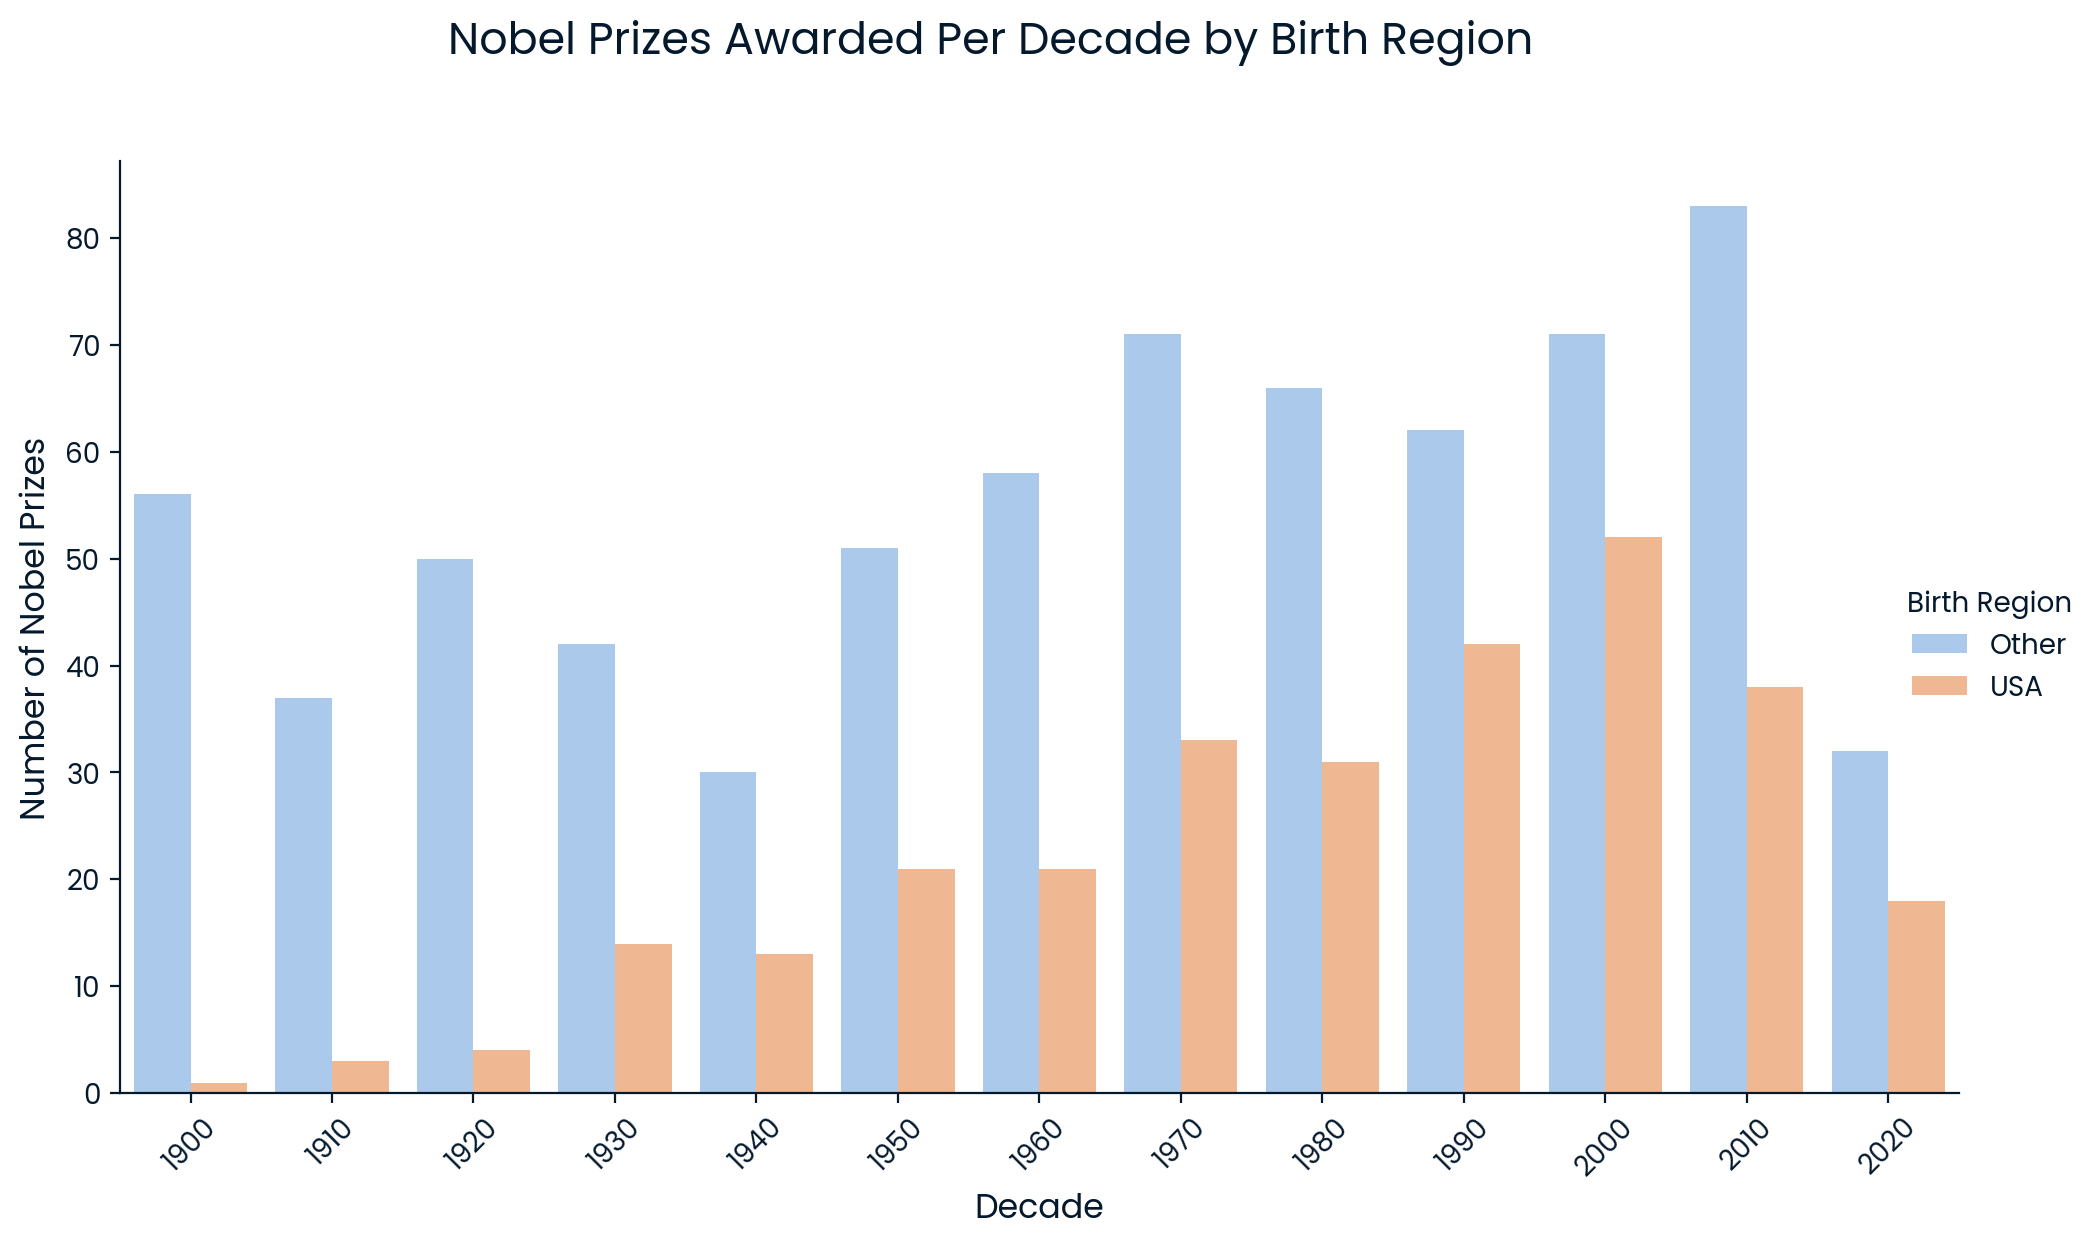

In [311]:
plt.figure(figsize=(12, 6))

# Create the bar plot to visualize the proportion of Nobel prizes awarded to the US vs other countries
g_proportion_us_by_decade = sns.catplot(
    data=grouped_by_decade_region,
    x='decade',
    y='count',
    hue='birth_region',
    palette='pastel',
    kind='bar',
    height=6,  # Controls height of the plot
    aspect=1.5  # Controls width of the plot so bars do not look so long and close to each other
)

# Title and axis labels
g_proportion_us_by_decade.fig.suptitle(
    'Nobel Prizes Awarded Per Decade by Birth Region', 
    y=1.03, fontsize=16
)
g_proportion_us_by_decade.set_axis_labels(
    'Decade', 'Number of Nobel Prizes', fontsize=12
)
g_proportion_us_by_decade.set_xticklabels(rotation=45)

# Customizing legend
legend = g_proportion_us_by_decade._legend
legend.set_title('Birth Region')
legend.set_bbox_to_anchor((1.05, 0.5))  # Position legend to the right
legend.set_frame_on(False)  # Remove legend frame

plt.tight_layout()

plt.show()

The chart shows a clear upward trend in the number of Nobel Prizes awarded to U.S.-born laureates over the decades. The proportion of U.S. laureates compared to those from other countries steadily increased, reaching its peak in the 2000s. This indicates that the U.S. was not only receiving more Nobel Prizes over time but also gaining a larger share of the global total, particularly in the decades preceding 2010, where there was a decline.

In [312]:
max_decade_usa_ind= grouped_by_decade_region[grouped_by_decade_region['birth_region'] == 'USA']['percentage'].idxmax()
max_decade_usa= grouped_by_decade_region.loc[max_decade_usa_ind, 'decade']
print(max_decade_usa)

2000


Which decade and Nobel Prize category combination had the highest proportion of female laureates?

Store this as a dictionary called max_female_dict where the decade is the key and the category is the value. There should only be one key:value pair.

In [313]:
# Group by 'decade' and 'category', calculate total and female laureates
grouped_decade_category = (
    nobel.groupby(['decade', 'category'])
    .agg(
        total_laureates=('sex', 'count'),
        female_laureates=('sex', lambda x: (x == 'Female').sum())
    )
    .reset_index()
)

print(grouped_decade_category)


    decade    category  total_laureates  female_laureates
0     1900   Chemistry                9                 0
1     1900  Literature               10                 1
2     1900    Medicine               11                 0
3     1900       Peace               13                 1
4     1900     Physics               13                 1
..     ...         ...              ...               ...
67    2020   Economics                9                 1
68    2020  Literature                4                 2
69    2020    Medicine                8                 1
70    2020       Peace                4                 2
71    2020     Physics               12                 2

[72 rows x 4 columns]


In [314]:
# Add a new column for the proportion of female laureates
grouped_decade_category['female_proportion'] = grouped_decade_category['female_laureates'] / grouped_decade_category['total_laureates']
grouped_decade_category= grouped_decade_category.sort_values(['female_proportion','category'], ascending= [False, True])
print(grouped_decade_category)


    decade    category  total_laureates  female_laureates  female_proportion
68    2020  Literature                4                 2                0.5
64    2010       Peace               10                 5                0.5
70    2020       Peace                4                 2                0.5
66    2020   Chemistry               10                 3                0.3
50    1990  Literature               10                 3                0.3
..     ...         ...              ...               ...                ...
29    1950     Physics               20                 0                0.0
41    1970     Physics               25                 0                0.0
47    1980     Physics               22                 0                0.0
53    1990     Physics               22                 0                0.0
59    2000     Physics               28                 0                0.0

[72 rows x 5 columns]


There are actually three instances with the same highest proportion of female laureates by decade and category:
68    2020  Literature                4                 2                0.5
70    2020       Peace                4                 2                0.5
64    2010       Peace               10                 5                0.5

In [315]:
# Find the row with the highest proportion of female laureates
max_female_row = grouped_decade_category.loc[grouped_decade_category['female_proportion'].idxmax()]

print(max_female_row)

decade                     2020
category             Literature
total_laureates               4
female_laureates              2
female_proportion           0.5
Name: 68, dtype: object


In [316]:
max_decade= max_female_row['decade']
max_category= max_female_row['category']
print(max_decade, max_category)
max_female_dict= {max_decade: max_category}
print(max_female_dic)

2020 Literature
{2020: 'Chemistry'}


<Figure size 1200x600 with 0 Axes>

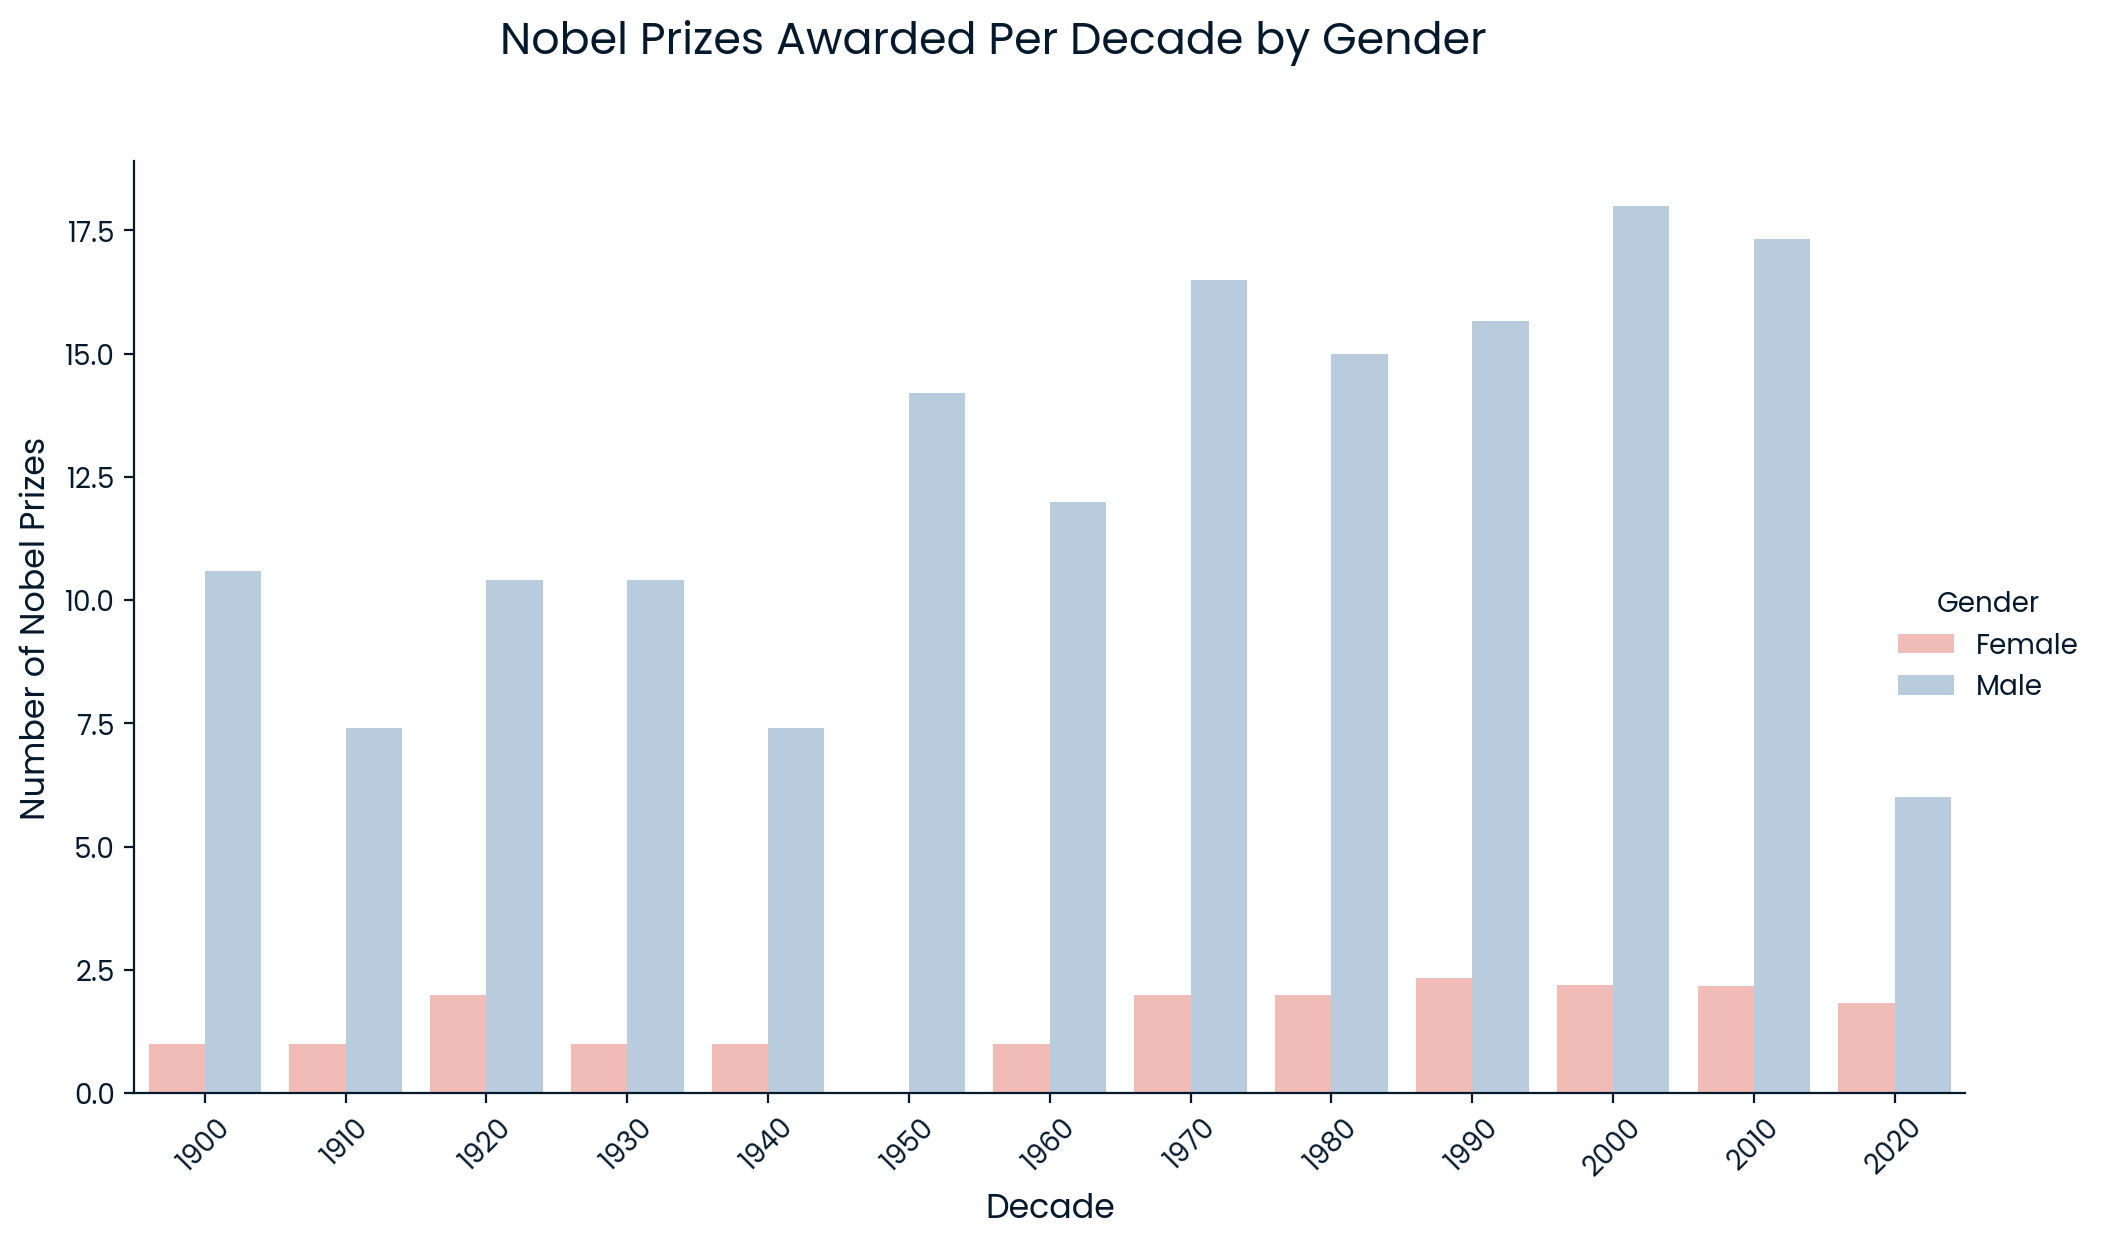

In [317]:
plt.figure(figsize=(12, 6))

# Create the bar plot to visualize the proportion of Nobel prizes awarded to the US vs other countries
g_proportion_female_by_decade = sns.catplot(
    data=grouped_by_decade_sex,
    x='decade',
    y='count',
    hue='sex',
    palette=['#FBB4AE', '#B3CDE3'],  # Fixed the palette list syntax
    kind='bar',
    ci=None,
    height=6,  # Controls height of the plot
    aspect=1.5  # Controls width of the plot so bars do not look so long and close to each other
)

# Title and axis labels
g_proportion_female_by_decade.fig.suptitle(
    'Nobel Prizes Awarded Per Decade by Gender', 
    y=1.03, fontsize=16
)
g_proportion_female_by_decade.set_axis_labels(
    'Decade', 'Number of Nobel Prizes', fontsize=12
)
g_proportion_female_by_decade.set_xticklabels(rotation=45)

# Customizing legend
legend = g_proportion_female_by_decade._legend
legend.set_title('Gender')
legend.set_bbox_to_anchor((1.05, 0.5))  # Position legend to the right
legend.set_frame_on(False)  # Remove legend frame

plt.tight_layout()

plt.show()

The graph highlights the significant gender disparity among Nobel laureates, with men overwhelmingly outnumbering women across decades. While the data shows a positive trend of increasing awards to women, particularly in recent decades, the gap remains substantial. This disparity underscores the historical challenges and systemic barriers faced by women in achieving recognition at the highest levels of academia and innovation, despite their growing contributions to fields celebrated by the Nobel Prizes.

Who was the first woman to receive a Nobel Prize, and in what category?

Save your string answers as first_woman_name and first_woman_category

In [318]:
Which individuals or organizations have been awarded more than once?

Marie Curie, née Sklodowska
Physics


Which individuals or orgniztions have been awarded more than once? Store the results as repeat_list.

In [319]:
# Group by full_name and calculate the count
grouped_by_name = nobel.groupby('full_name').size().sort_values(ascending=False)

# Reset the index to convert it into a DataFrame
grouped_by_name = grouped_by_name.reset_index(name='count')

#Selecting laureates awarded more than once
repeated= grouped_by_name[grouped_by_name['count']>1]
print(repeated)

                                           full_name  count
0  Comité international de la Croix Rouge (Intern...      3
1  Office of the United Nations High Commissioner...      2
2                                   Frederick Sanger      2
3                                 Linus Carl Pauling      2
4                                       John Bardeen      2
5                        Marie Curie, née Sklodowska      2


In [320]:
repeat_list= repeated['full_name'].tolist()
print(repeat_list)

['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Office of the United Nations High Commissioner for Refugees (UNHCR)', 'Frederick Sanger', 'Linus Carl Pauling', 'John Bardeen', 'Marie Curie, née Sklodowska']
